In [14]:
import scipy.io
import numpy as np
import csv

path='./data/chang/1'
# data = scipy.io.loadmat(path+".csv")  # 读取mat文件
# train_y=data["an"]
reader=csv.reader(open(path+".csv"))
train_y=[]
for i in reader:
    train_y.append([float(j) for j in i])

train_y=np.array(train_y)
print(train_y.shape)

path='./data/NWP/CN0088'
# data = scipy.io.loadmat(path+".mat")  # 读取mat文件
# train_x=data["an"][:,:25]
reader=csv.reader(open(path+".csv"))
train_x=[]
for i in reader:
    train_x.append([float(j) for j in i])

train_x=np.array(train_x)
train_x=train_x[:,:25]
print(train_x.shape)


(34136, 3)
(52368, 25)


In [15]:
index=np.array([l for l in train_x[:,0] if  l in train_y[:,0]])
trainx=[]
for j in range(len(train_x)):
    if train_x[j,0] in index:
            trainx.append(train_x[j,:])

trainy=[]
for j in range(len(train_y)):
    if train_y[j,0] in index:
        
        if len(trainy)> 0:
            if train_y[j,0] not in trainy[:][0]:
                trainy.append(train_y[j,:])
        else:
            trainy.append(train_y[j,:])

train_y=np.array(trainy)
train_x=np.array(trainx)
print(train_x.shape)
print(train_y.shape)

(34088, 25)
(34088, 3)


In [16]:
print(train_x[-1,:])
print(train_y[-1,:])

[  7.37060990e+05   2.79360000e+02   1.00000000e-02   3.34000000e+00
   2.37000000e+00   2.39000000e+00   2.25000000e+00   1.65000000e+00
   1.65000000e+00   3.96000000e+00   4.63000000e+00   3.34000000e+00
   3.34000000e+00   1.02892000e+03   0.00000000e+00  -3.08300000e+01
  -1.13700000e+01   1.15000000e+00  -9.95300000e+01   1.02709000e+03
   0.00000000e+00   0.00000000e+00   0.00000000e+00   2.77920000e+02
   6.79400000e+01]
[  7.37060990e+05   8.11000000e+00   1.35300000e+01]


In [17]:
# matrix_load = np.array(train_x[:,2:])
# shifted_value = matrix_load.mean()
# print("shifted_value:",shifted_value)
# train_x = matrix_load-shifted_value
# print ("train_x Data  shape: ", train_x.shape)
# print(train_x[0][:10])

# matrix_load = np.array(train_y[:,1:])
# shifted_value = matrix_load.mean()
# print("shifted_value:",shifted_value)
# train_y = matrix_load-shifted_value
# print ("train_y Data  shape: ", train_y.shape)
# print(train_x[0][:])
from sklearn import preprocessing
train_x = preprocessing.scale(train_x[:,2:])
train_y= preprocessing.scale(train_y[:,1:])

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(train_x,train_y,test_size=0.3,random_state=0)


In [19]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print(x_train.shape)
print(y_train.shape)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
print(x_test.shape)
print(y_test.shape)

(23861, 23, 1)
(23861, 2)
(10227, 23, 1)
(10227, 2)


In [20]:
from keras.models import Model
from keras.layers import *

input_shape=Input(shape=(x_train.shape[1],x_train.shape[2]))
x=LSTM(64,input_shape=(x_train.shape[1],x_train.shape[2]), return_sequences=True)(input_shape)
x=LSTM(32)(x)
x=Dense(2, activation='linear')(x)
model=Model(inputs=input_shape,outputs=x)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 23, 1)             0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 23, 64)            16896     
_________________________________________________________________
lstm_4 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 29,378
Trainable params: 29,378
Non-trainable params: 0
_________________________________________________________________


In [21]:
# compile the model
model.compile(loss="mse", optimizer="rmsprop")
from keras.utils import plot_model
plot_model(model,"model.png",show_shapes=True)

In [22]:

#model.fit(x_train, y_train, batch_size=512, epochs=10, validation_split=0.5, verbose=1)


Train on 11930 samples, validate on 11931 samples
Epoch 1/10
11930/11930 [==============================] - 10s 825us/step - loss: 0.9013 - val_loss: 0.9160
Epoch 2/10
11930/11930 [==============================] - 8s 698us/step - loss: 0.8492 - val_loss: 0.8877
Epoch 3/10
11930/11930 [==============================] - 9s 728us/step - loss: 0.8226 - val_loss: 0.8205
Epoch 4/10
11930/11930 [==============================] - 10s 815us/step - loss: 0.7928 - val_loss: 0.7888
Epoch 5/10
11930/11930 [==============================] - 9s 733us/step - loss: 0.7576 - val_loss: 0.9862
Epoch 6/10
11930/11930 [==============================] - 9s 719us/step - loss: 0.7391 - val_loss: 0.7223
Epoch 7/10
11930/11930 [==============================] - 9s 720us/step - loss: 0.7308 - val_loss: 0.7397
Epoch 8/10
11930/11930 [==============================] - 11s 959us/step - loss: 0.7187 - val_loss: 0.7366
Epoch 9/10
11930/11930 [==============================] - 9s 780us/step - loss: 0.6995 - val_loss: 

In [23]:
test_mse = model.evaluate(x_test, y_test, verbose=1)
print ('\nThe mean squared error (MSE) on the test data set is %.3f over %d test samples.' % (test_mse, len(y_test)))


10227/10227 [==============================] - 3s 335us/step

The mean squared error (MSE) on the test data set is 0.700 over 10227 test samples.


In [24]:
predicted_values = model.predict(x_test)
num_test_samples = len(predicted_values)
print(num_test_samples)
print(predicted_values.shape)


10227
(10227, 2)


In [25]:
print(predicted_values[1,:])
print(y_test[1,:])

[-0.12682514 -0.2848638 ]
[-0.43033734 -0.48974186]


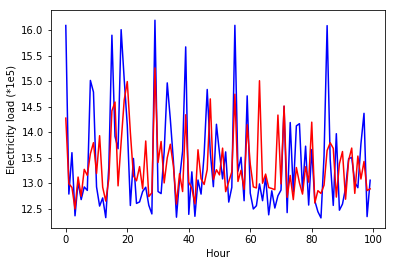

In [27]:
import matplotlib.pyplot as plt
# plot the results
fig = plt.figure()
plt.plot(y_test[:100,1] + shifted_value,'b')
plt.plot(predicted_values[:100,1] + shifted_value,'r')
plt.xlabel('Hour')
plt.ylabel('Electricity load (*1e5)')
plt.show()
fig.savefig('output_load_forecasting.jpg', bbox_inches='tight')